In [16]:
suppressMessages(library(dplyr))
library(tidyr)
library(sp)
library(raster)
library(rgeos)
library(rgbif)
library(viridis)
library(gridExtra)
library(rasterVis)
library(raster)
library(rgdal)

In [17]:
# Band 1 is loaded by default
df1 <- raster("~/Desktop/BlackMarble_2016_01deg_geo.tif")

# load other bands
df2 <- raster("~/Desktop/BlackMarble_2016_01deg_geo.tif", band=2)
df3 <- raster("~/Desktop/BlackMarble_2016_01deg_geo.tif", band=3)

In [18]:
df1 # view attributes

class      : RasterLayer 
band       : 1  (of  3  bands)
dimensions : 1800, 3600, 6480000  (nrow, ncol, ncell)
resolution : 0.1, 0.1  (x, y)
extent     : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : /Users/chan5416/Desktop/BlackMarble_2016_01deg_geo.tif 
names      : BlackMarble_2016_01deg_geo 
values     : 0, 255  (min, max)


In [19]:
grayscale_colors <- 
    gray.colors(100,    # number of different color levels 
        start = 0.0,    # how black (0) to go
        end = 1.0,      # how white (1) to go
        gamma = 2.2,    # correction between how a digital 
                        # camera sees the world and how human eyes see it
        alpha = NULL)  

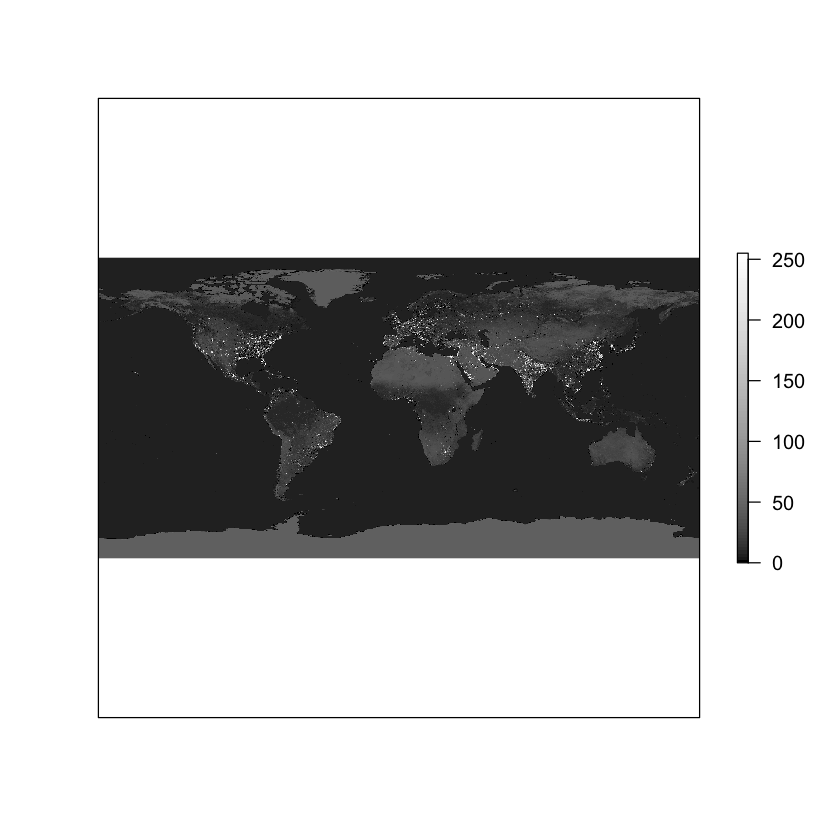

In [20]:
plot(df1, 
     col=grayscale_colors, 
     axes=FALSE)

In [21]:
# Use stack to read in all three bands
df_stack <- stack("~/Desktop/BlackMarble_2016_01deg_geo.tif")

In [22]:
df_stack

class      : RasterStack 
dimensions : 1800, 3600, 6480000, 3  (nrow, ncol, ncell, nlayers)
resolution : 0.1, 0.1  (x, y)
extent     : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names      : BlackMarble_2016_01deg_geo.1, BlackMarble_2016_01deg_geo.2, BlackMarble_2016_01deg_geo.3 
min values :                            0,                            0,                            0 
max values :                          255,                          255,                          255 


In [23]:
df_stack@layers

[[1]]
class      : RasterLayer 
band       : 1  (of  3  bands)
dimensions : 1800, 3600, 6480000  (nrow, ncol, ncell)
resolution : 0.1, 0.1  (x, y)
extent     : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : /Users/chan5416/Desktop/BlackMarble_2016_01deg_geo.tif 
names      : BlackMarble_2016_01deg_geo.1 
values     : 0, 255  (min, max)


[[2]]
class      : RasterLayer 
band       : 2  (of  3  bands)
dimensions : 1800, 3600, 6480000  (nrow, ncol, ncell)
resolution : 0.1, 0.1  (x, y)
extent     : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : /Users/chan5416/Desktop/BlackMarble_2016_01deg_geo.tif 
names      : BlackMarble_2016_01deg_geo.2 
values     : 0, 255  (min, max)


[[3]]
class      : RasterLayer 
band       : 3  (of  3  bands)
dimensions : 1800, 3600, 6480000  (nrow, ncol, ncell)
resolution : 0.1, 0.1  (x

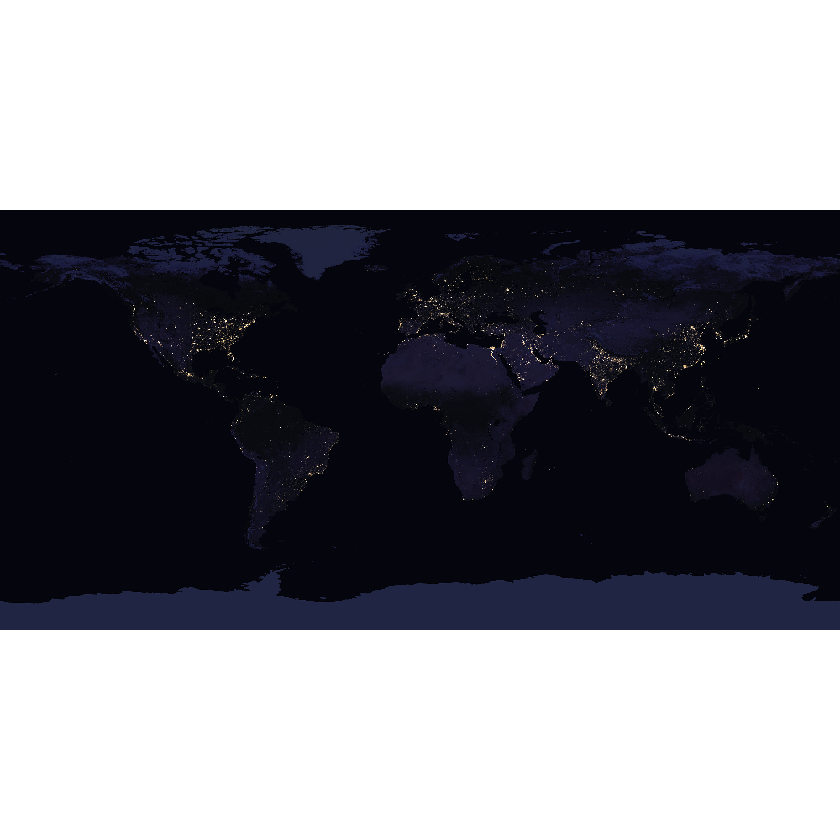

In [24]:
#Plot all three layers
plotRGB(df_stack, r=1, g=2, b=3)

In [25]:
clip_list <- c(-80, -70, 35, 45)
newmap <- crop(df_stack, clip_list)

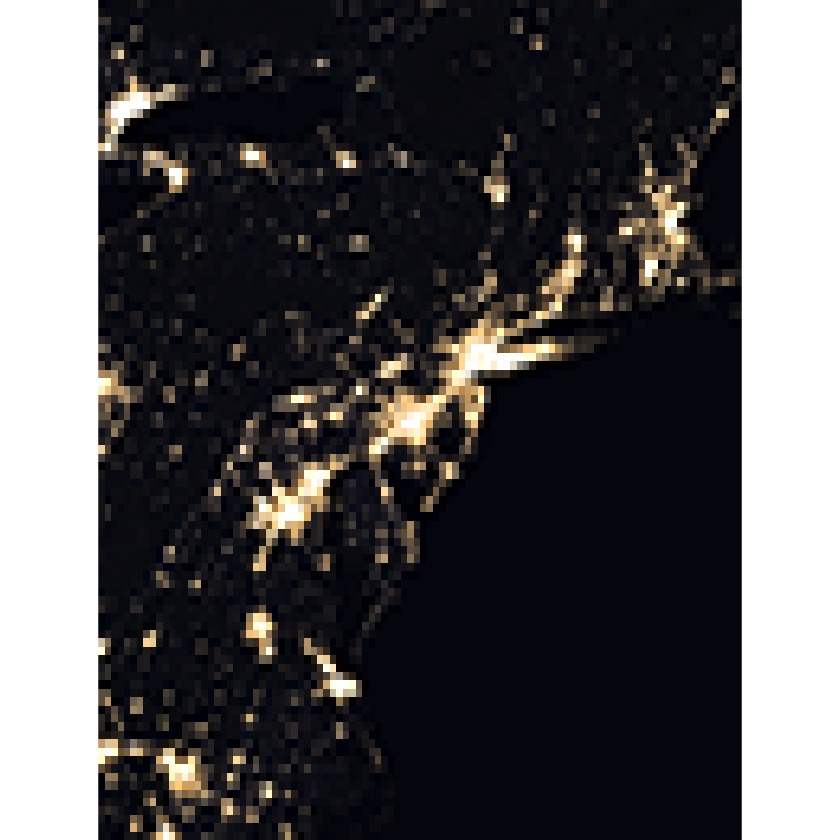

In [26]:
plotRGB(newmap)

In [31]:
testimport <- raster("~/Downloads/F182010.v4c_web.avg_vis.lzw.tif")

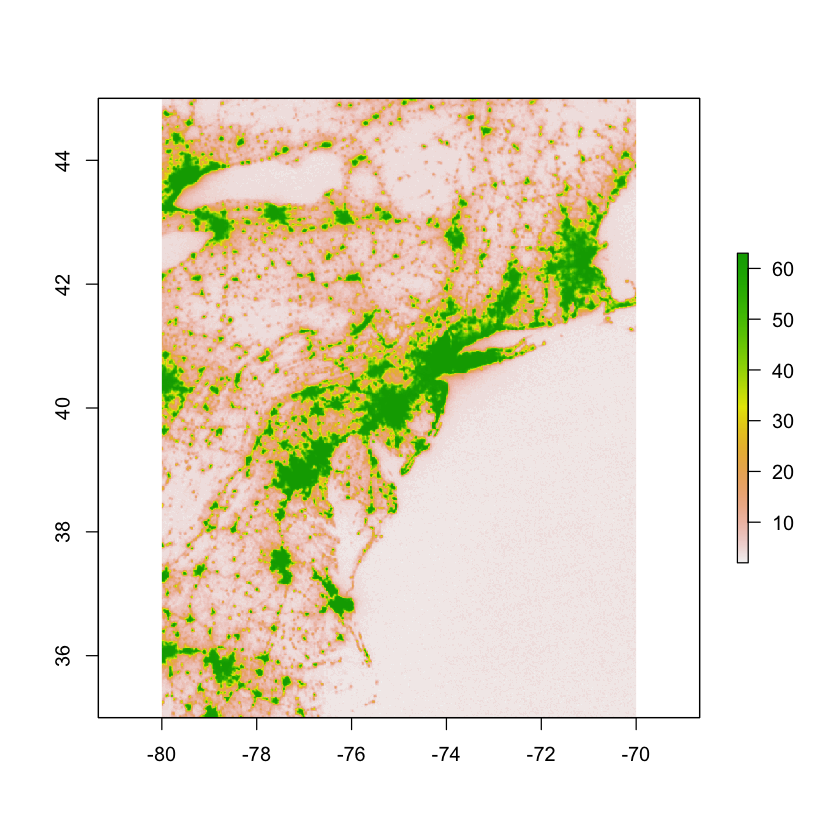

In [32]:
plot(testimport)

In [35]:
r <- rasterize(testimport, testimport, field=1)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘rasterize’ for signature ‘"RasterLayer", "RasterLayer"’
